##### Steps
1. Get Image or video capture
2. Load detection algorithm
3. transform image to gray scale
4. detect the faces on the gray image
5. The detection return the coordinate around the face
6. Draw a Rectangle on the colored image

##### Live Feed
The code below takes input from a live video capture devices and process it in real time

In [ ]:
import cv2
import time

webcam = cv2.VideoCapture(0)
face_detection = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

while True:
    ignore, frame = webcam.read()
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    faces = face_detection.detectMultiScale(gray_frame,1.05,5)  # return a list of face coordinates

    for x, y, w, h in faces:  # We loop through a list if there are multiple faces
        frame = cv2.rectangle(frame, (x,y), (x+w,y+h), (0,0,255), 10)

    cv2.imshow("Webcam", frame)

    if cv2.waitKey(1) == 32: # Space Bar to close
        break
    
webcam.release()
cv2.destroyAllWindows()

##### Detect Single Image

Time: 2.744825601577759


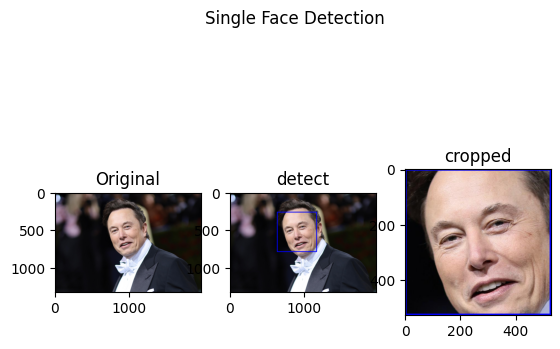

In [12]:
# Import packages
import os
import cv2
import matplotlib.pyplot as plt
from time import time

start = time()
face_detection = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

img = cv2.imread('../test_images/1.jpg')
# print(os.getcwd())
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
faces = face_detection.detectMultiScale(img_gray,1.05, 55)

fig, ax = plt.subplots(ncols=3)  # ax is a list of axes

fig.suptitle('Single Face Detection')

# Original Image
ax[0].imshow(img)
ax[0].set_title("Original")

# Detected face
x, y, w, h = faces[0]  # Faces is a list of list, each list has the coordinates of one face 
detected_face = cv2.rectangle(img, (x,y), (x+w,y+h), (0,0,255), 10)
ax[1].imshow(detected_face)
ax[1].set_title("detect")

# Cropped Face
cropped_img = img[y:y+h, x:x+w] # Y -> X
ax[2].imshow(cropped_img)
ax[2].set_title("cropped")

end = time()
print('Time:', end-start, 'ms')

plt.show()


##### Multi Face

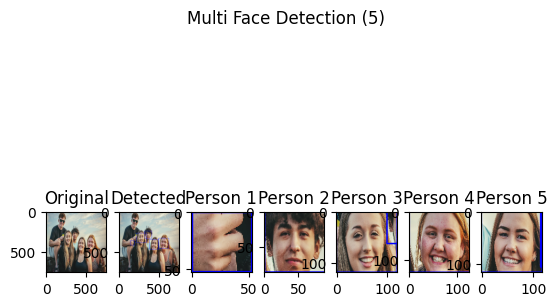

In [15]:
# Import packages
import cv2
import matplotlib.pyplot as plt
import os

FOLDER_NAME = "../test_images"
IMG_NAME = '5.jpg'

face_detection = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

img_path = os.path.join(FOLDER_NAME, IMG_NAME)

img = cv2.imread(img_path)
img = cv2.resize(img, (750, 750))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = face_detection.detectMultiScale(img_gray,1.01,20)  # 1.05, 55 -> No Resize  # 
# img , scale_factor, nearest neighbor

n = len(faces)
fig, ax = plt.subplots(ncols=n+2)  # ax is a list of axes
fig.suptitle(f'Multi Face Detection ({n})')

ax[0].imshow(img)
ax[0].set_title("Original")

next = 2 
for x,y, w, h in faces: 
    cv2.rectangle(img, (x,y), (x+w,y+h), (0,0,255), 2)  # Overwrite the original image in memory
    ax[1].imshow(img)
    ax[1].set_title("Detected")
    
    # Save img
    name, ext = os.path.splitext(IMG_NAME)
    detected_img_path = os.path.join(FOLDER_NAME, name+"-detected"+ext)
    cv2.imwrite(detected_img_path, cv2.cvtColor(img, cv2.COLOR_RGB2BGR))  # cv2 expects BGR img so must convert back
    
    cropped_img = img[y:y+h, x:x+w] # Y -> X
    ax[next].imshow(cropped_img)
    ax[next].set_title(f"Person {next - 1}")
    next += 1
    
plt.show()

##### Comparing Trained Haar Classifer 

running...


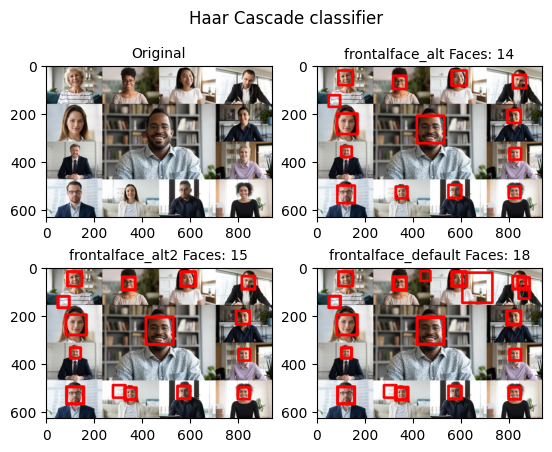

In [21]:
import cv2
from time import time
import matplotlib.pyplot as plt

print("running...")

start = time()

IMG_PATH = '../test_images/13.jpg'

img = cv2.imread(IMG_PATH)
img = cv2.cvtColor(img, cv2.COLOR_BGR2BGRA)

classifiers_list = [
    'haarcascade_frontalface_alt.xml',
    'haarcascade_frontalface_alt2.xml',
    'haarcascade_frontalface_default.xml',
]


fig, axs = plt.subplots(ncols=2, nrows=2)  # ax is a list of axes
fig.suptitle(f'Haar Cascade classifier')

flatten_axs = axs.ravel()

flatten_axs[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
flatten_axs[0].set_title("Original", fontsize=10)

index = 1
for classifier in classifiers_list:
    
    face_detection = cv2.CascadeClassifier(cv2.data.haarcascades + classifier)
    faces = face_detection.detectMultiScale(img,1.01,10)
    
    for x, y, w, h in faces:
        cv2.rectangle(img, (x,y), (x+w,y+h), (0,0,255), 10)
    
    n = len(faces)
    flatten_axs[index].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    flatten_axs[index].set_title(classifier[12:-4] + f' Faces: {n}', fontsize=10)
    
    index = index + 1

plt.show()
    
